# Import Library

In [1]:
#semeone suggest to initiate the run with these codes to avoid unkown error with ConV
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層2與池化層2

In [12]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

#建立神經網路(平坦層、隱藏層、輸出層)

In [15]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [17]:
model.add(Dense(10, activation='softmax'))

In [18]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [19]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [20]:
#define a function to show train histry in plots
import matplotlib.pyplot as plt
def show_train_history(train, test, KPI):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[test])
    plt.title('Train History of '+ KPI)
    if KPI== 'acc':
        plt.ylabel('Accuracy')
   
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc='upper left')
    plt.show()

In [21]:
#選用categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [22]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 132s 3ms/step - loss: 1.8153 - acc: 0.3409 - val_loss: 1.6127 - val_acc: 0.4552
Epoch 2/10
40000/40000 [==============================] - 140s 4ms/step - loss: 1.4531 - acc: 0.4779 - val_loss: 1.3854 - val_acc: 0.5358
Epoch 3/10
40000/40000 [==============================] - 146s 4ms/step - loss: 1.2985 - acc: 0.5383 - val_loss: 1.3052 - val_acc: 0.5830
Epoch 4/10
40000/40000 [==============================] - 157s 4ms/step - loss: 1.1927 - acc: 0.5773 - val_loss: 1.2161 - val_acc: 0.6148
Epoch 5/10
40000/40000 [==============================] - 163s 4ms/step - loss: 1.1082 - acc: 0.6077 - val_loss: 1.1585 - val_acc: 0.6365
Epoch 6/10
40000/40000 [==============================] - 161s 4ms/step - loss: 1.0371 - acc: 0.6326 - val_loss: 1.1152 - val_acc: 0.6376
Epoch 7/10
40000/40000 [==============================] - 161s 4ms/step - 

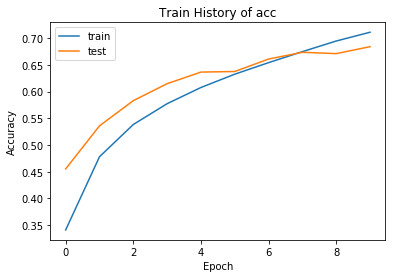

In [23]:
show_train_history('acc','val_acc','acc')

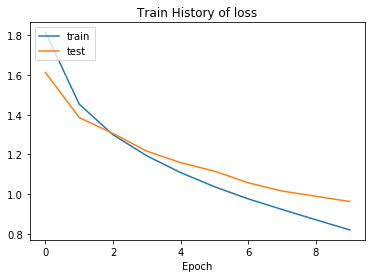

In [24]:
show_train_history('loss','val_loss','loss')

In [25]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 9s 927us/step

accuracy= 0.6721


In [26]:
#選用MSE
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy'])

In [27]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 159s 4ms/step - loss: 0.0346 - acc: 0.7528 - val_loss: 0.0424 - val_acc: 0.7028
Epoch 2/10
40000/40000 [==============================] - 158s 4ms/step - loss: 0.0336 - acc: 0.7594 - val_loss: 0.0423 - val_acc: 0.7029
Epoch 3/10
40000/40000 [==============================] - 156s 4ms/step - loss: 0.0332 - acc: 0.7626 - val_loss: 0.0419 - val_acc: 0.7074
Epoch 4/10
40000/40000 [==============================] - 155s 4ms/step - loss: 0.0327 - acc: 0.7677 - val_loss: 0.0415 - val_acc: 0.7109 
Epoch 5/10
40000/40000 [==============================] - 155s 4ms/step - loss: 0.0322 - acc: 0.7689 - val_loss: 0.0414 - val_acc: 0.7116
Epoch 6/10
40000/40000 [==============================] - 156s 4ms/step - loss: 0.0319 - acc: 0.7733 - val_loss: 0.0413 - val_acc: 0.7114
Epoch 7/10
40000/40000 [==============================] - 155s 4ms/step - loss: 0.0315 - acc: 0.7765 - val_loss: 0.0410 -

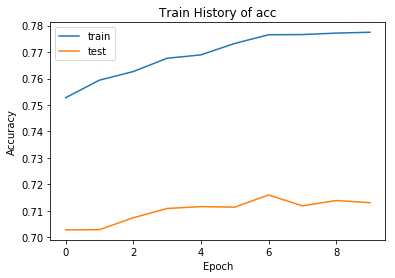

In [28]:
show_train_history('acc','val_acc','acc')

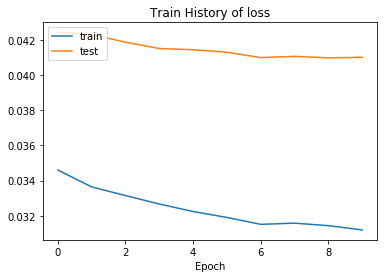

In [29]:
show_train_history('loss','val_loss','loss')

In [30]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 9s 918us/step

accuracy= 0.706


In [31]:
#選用binary _crossentropy
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [32]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 157s 4ms/step - loss: 0.1080 - acc: 0.9578 - val_loss: 0.1400 - val_acc: 0.9460 loss: 0.1080 - acc
Epoch 2/10
40000/40000 [==============================] - 157s 4ms/step - loss: 0.1065 - acc: 0.9583 - val_loss: 0.1396 - val_acc: 0.9464 0.1065 - acc: 0.9
Epoch 3/10
40000/40000 [==============================] - 156s 4ms/step - loss: 0.1046 - acc: 0.9593 - val_loss: 0.1399 - val_acc: 0.9462
Epoch 4/10
40000/40000 [==============================] - 156s 4ms/step - loss: 0.1034 - acc: 0.9593 - val_loss: 0.1376 - val_acc: 0.9472
Epoch 5/10
40000/40000 [==============================] - 156s 4ms/step - loss: 0.1023 - acc: 0.9599 - val_loss: 0.1368 - val_acc: 0.9473
Epoch 6/10
40000/40000 [==============================] - 157s 4ms/step - loss: 0.1001 - acc: 0.9611 - val_loss: 0.1367 - val_acc: 0.9474
Epoch 7/10
40000/40000 [==============================] - 156s 4ms/step - loss: 0.098

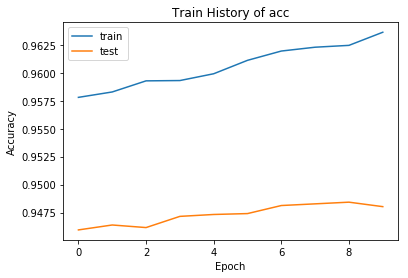

In [33]:
show_train_history('acc','val_acc','acc')

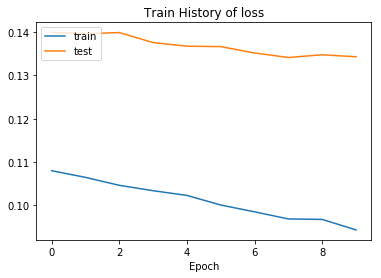

In [34]:
show_train_history('loss','val_loss','loss')

In [35]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 9s 940us/step

accuracy= 0.9465800233840942
